In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [22]:
# def provided by https://towardsdatascience.com/comprehensive-tutorial-on-using-confusion-matrix-in-classification-92be4d70ea18
def custom_confusion_matrix(y_true, y_pred, display_labels=None):
    """
    A function to plot a custom confusion matrix with
    positive class as the first row and the first column.
    """
    # Create a flipped matrix
    cm = np.flip(confusion_matrix(y_true, y_pred))
    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 5))
    cmp = ConfusionMatrixDisplay(cm, display_labels=display_labels)
    cmp.plot(ax=ax, cmap='PuRd')
    plt.grid(False)

In [2]:
df = pd.read_csv('./cleaned_df.csv')
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,MAP
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967,90.000
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.928,106.667
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.508,90.000
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710,116.667
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011,73.333


In [3]:
X = df.drop('cardio', axis=1)
y = df.cardio

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                      train_size=0.8,
                                      test_size=0.2,
                                      shuffle=True,
                                      random_state=0)

In [8]:
#Hyperparameter tuning using Gridsearch
svm = SVC(random_state=0)
# param_grid = {'C':[0.01,0.05,0.1,1,10, 100, 1000],'kernel':['linear','rbf'], 'gamma':['scale','auto'] }
param_grid = {'C': [10, 100, 1000],
              'gamma': [0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(svm, param_grid, return_train_score=True, verbose=2, cv=3)

In [9]:
#Fitting the model
grid.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ....................................C=10, gamma=0.1; total time= 3.3min
[CV] END ....................................C=10, gamma=0.1; total time= 3.5min
[CV] END ....................................C=10, gamma=0.1; total time= 2.9min
[CV] END ...................................C=10, gamma=0.01; total time= 4.9min
[CV] END ...................................C=10, gamma=0.01; total time= 4.8min
[CV] END ...................................C=10, gamma=0.01; total time= 4.5min
[CV] END ..................................C=10, gamma=0.001; total time= 3.4min
[CV] END ..................................C=10, gamma=0.001; total time= 3.4min
[CV] END ..................................C=10, gamma=0.001; total time= 3.4min
[CV] END .................................C=10, gamma=0.0001; total time= 1.8min
[CV] END .................................C=10, gamma=0.0001; total time= 1.9min
[CV] END .................................C=10, 

GridSearchCV(cv=3, estimator=SVC(random_state=0),
             param_grid={'C': [10, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             return_train_score=True, verbose=2)

In [10]:
print('\033[1mBest Parameters of GridSearchCV for SVM Model:\033[0m', grid.best_params_)
print("--------------------------------------------------------------------------------------------------------------------")
print('\033[1mBest Estimator of GridSearchCV for SVM Model:\033[0m', grid.best_estimator_)

Best Parameters of GridSearchCV for SVM Model: {'C': 100, 'gamma': 0.0001}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for SVM Model: SVC(C=100, gamma=0.0001, random_state=0)


In [11]:
#Train and valid score
results = pd.DataFrame()
results['C'] = grid.cv_results_['param_C']
results['gamma'] = grid.cv_results_['param_gamma']
results['train error'] = 1 - grid.cv_results_['mean_train_score']
results['valid error'] = 1 - grid.cv_results_['mean_test_score']  #test score = validation score
results.head()

,C,gamma,train error,valid error
0,10,0.1,0.000188,0.451693
1,10,0.01,0.024694,0.366190
2,10,0.001,0.201237,0.303792
3,10,0.0001,0.269218,0.279991
4,100,0.1,0.000150,0.451693


In [12]:
ix = results['valid error'].idxmin()
results.iloc[ix]

C                   100
gamma            0.0001
train error    0.255833
valid error    0.279013
Name: 7, dtype: object

In [13]:
train_acc = 1 - 0.255833
valid_acc = 1 - 0.279013

print("\033[1mTrain accuracy: \033 ", train_acc)
print("\033[1mValid accuracy: \033 ", valid_acc)

Train accuracy:   0.744167
Valid accuracy:   0.720987


In [14]:
y_pred = grid.predict(X_test)
y_train_pred = grid.predict(X_train)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")



[[5302 1485]
 [2126 4385]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.78      0.75      6787
           1       0.75      0.67      0.71      6511

    accuracy                           0.73     13298
   macro avg       0.73      0.73      0.73     13298
weighted avg       0.73      0.73      0.73     13298

--------------------------------------------------------


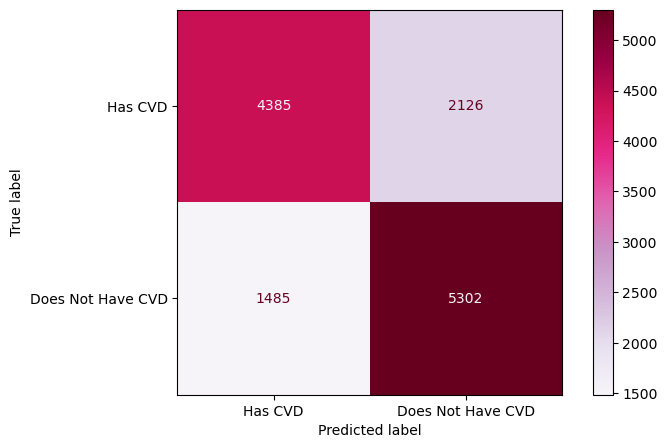

In [25]:
custom_confusion_matrix(y_test, y_pred,display_labels=["Has CVD", "Does Not Have CVD"])

In [20]:
test_acc = accuracy_score(y_test, y_pred)
print("\033[1mTest accuracy: \033 ", test_acc)

Test accuracy:   0.7284554068280944
